Evaluation Metrics and Regression Implementation
Assignment Question

THEORY QUESTIONS

1. **What does R-squared represent in a regression model?**  
   - R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables in the model. It ranges from 0 to 1, where higher values indicate a better fit.

2. **What are the assumptions of linear regression?**  
   - Linearity: Relationship between predictors and response is linear.  
   - Independence: Residuals are independent of each other.  
   - Homoscedasticity: Residuals have constant variance across predictor levels.  
   - Normality: Residuals are approximately normally distributed.  
   - No multicollinearity: Predictors are not highly correlated with each other.

3. **What is the difference between R-squared and Adjusted R-squared?**  
   - R-squared increases with more predictors, even if they are irrelevant. Adjusted R-squared penalizes adding unnecessary predictors, providing a more accurate measure for models with multiple variables.

4. **Why do we use Mean Squared Error (MSE)?**  
   - MSE quantifies the average squared difference between predicted and actual values. It emphasizes larger errors due to squaring, making it useful for optimization (e.g., gradient descent).

5. **What does an Adjusted R-squared value of 0.85 indicate?**  
   - The model explains 85% of the variance in the dependent variable, adjusted for the number of predictors. This suggests a strong fit, assuming assumptions are met.

6. **How do we check for normality of residuals in linear regression?**  
   - Use a Q-Q plot (quantile-quantile plot) to compare residuals to a normal distribution. Statistical tests like Shapiro-Wilk or Kolmogorov-Smirnov can also be applied.

7. **What is multicollinearity, and how does it impact regression?**  
   - Multicollinearity occurs when predictors are highly correlated. It inflates standard errors of coefficients, making them unstable and less interpretable.

8. **What is Mean Absolute Error (MAE)?**  
   - MAE is the average of absolute differences between predicted and actual values. It is less sensitive to outliers compared to MSE.

9. **What are the benefits of using an ML pipeline?**  
   - Automates workflows (preprocessing, training, evaluation), ensures reproducibility, reduces errors, and simplifies deployment.

10. **Why is RMSE considered more interpretable than MSE?**  
    - RMSE is in the same units as the target variable (e.g., dollars, meters), whereas MSE is in squared units, making RMSE easier to contextualize.

11. **What is pickling in Python, and how is it useful in ML?**  
    - Pickling is a serialization method to save Python objects (e.g., trained models) to disk. It allows reusing models without retraining.

12. **What does a high R-squared value mean?**  
    - A high R-squared (close to 1) indicates the model explains most of the variance in the dependent variable. However, it does not guarantee causal relationships or absence of overfitting.

13. **What happens if linear regression assumptions are violated?**  
    - Coefficients may become biased or inefficient. Predictions lose reliability. Solutions include transforming variables or using robust regression methods.

14. **How can we address multicollinearity in regression?**  
    - Remove correlated predictors, apply dimensionality reduction (e.g., PCA), use regularization (e.g., Ridge Regression), or collect more data.

15. **How can feature selection improve model performance in regression analysis?**  
    - Reduces overfitting by eliminating irrelevant features, improves interpretability, and decreases computational cost.

16. **How is Adjusted R-squared calculated?**  
    - Formula:  
      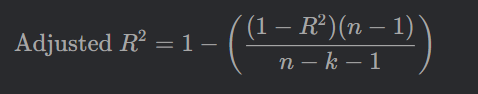

17. **Why is MSE sensitive to outliers?**  
    - Squaring large errors magnifies their impact, causing MSE to increase disproportionately compared to MAE.

18. **What is the role of homoscedasticity in linear regression?**  
    - Homoscedasticity ensures residuals have constant variance. Violations (heteroscedasticity) lead to unreliable standard errors and confidence intervals.

19. **What is Root Mean Squared Error (RMSE)?**  
    - RMSE is the square root of MSE. It provides error magnitude in the target variable’s units (e.g., "5 meters error").

20. **Why is pickling considered risky?**  
    - Pickled files can execute arbitrary code during deserialization, posing security risks if sourced from untrusted parties.

21. **What alternatives exist to pickling for saving ML models?**  
    - Joblib (efficient for large NumPy arrays), ONNX (cross-platform), or framework-specific methods (e.g., TensorFlow’s `save_model`, PyTorch’s `torch.save`).

22. **What is heteroscedasticity, and why is it a problem?**  
    - Heteroscedasticity refers to non-constant variance in residuals. It violates regression assumptions, leading to biased standard errors and unreliable hypothesis tests.

23. **How can interaction terms enhance a regression model’s predictive power?**  
    - Interaction terms model combined effects of predictors (e.g., \(X_1 \times X_2\)), capturing synergies that individual terms might miss.

PRACTICAL QUESTIONS

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

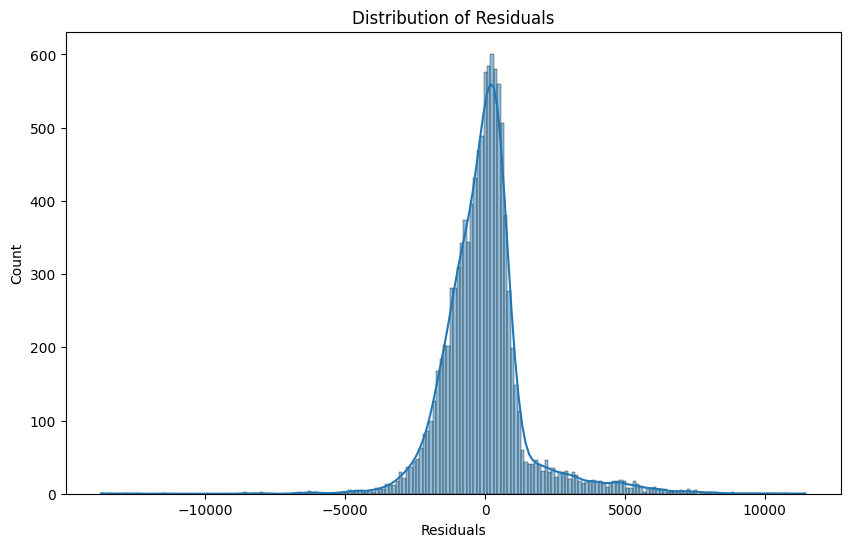

In [2]:
# 1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn’s “diamonds” dataset.

diamonds = sns.load_dataset('diamonds')
X = diamonds[['carat', 'depth', 'table']]  # Example features
y = diamonds['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [3]:
# 2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 2333883.18
MAE: 994.74
RMSE: 1527.71


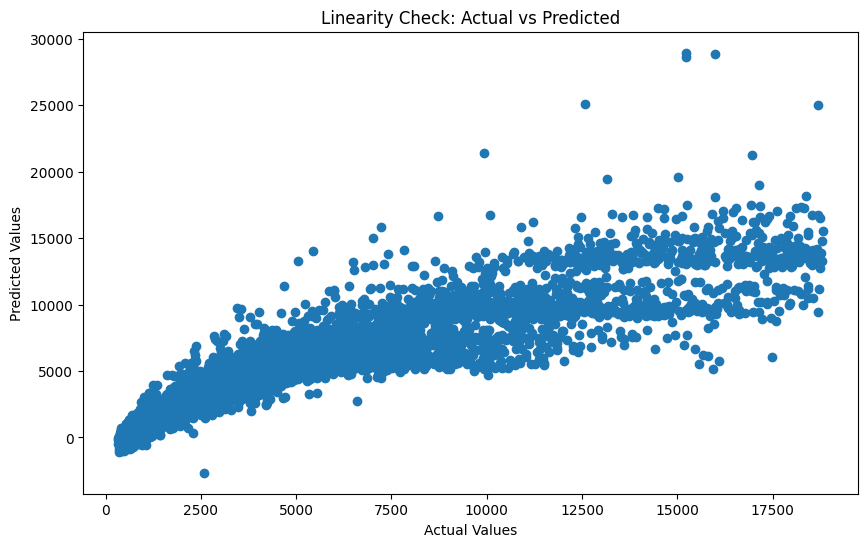

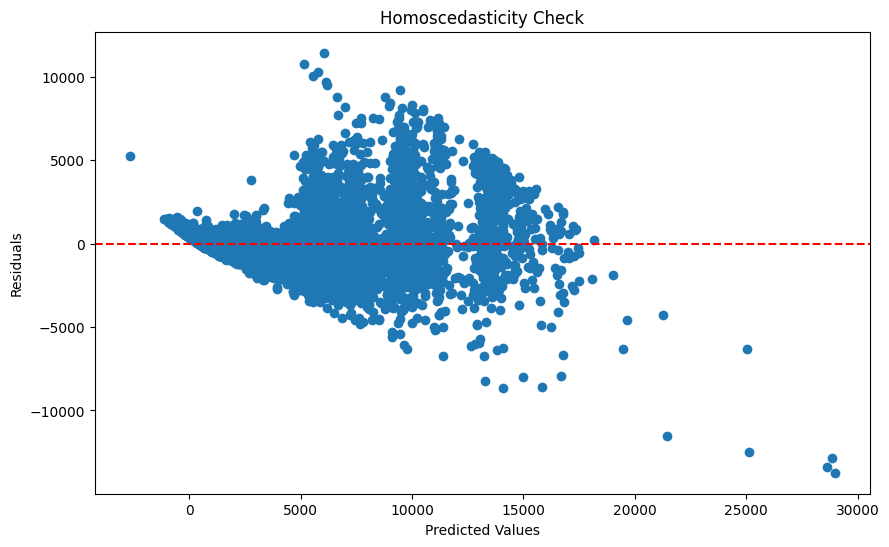

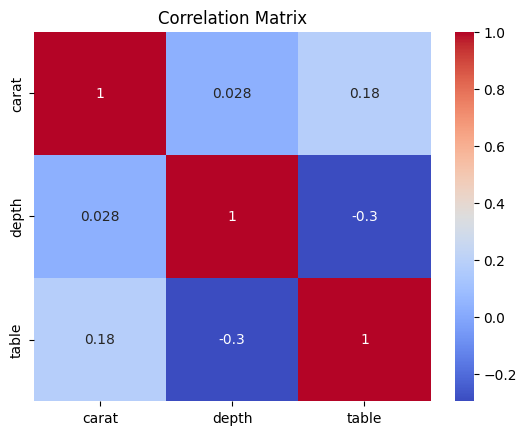

In [4]:
# 3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

# Linearity: Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linearity Check: Actual vs Predicted')
plt.show()

# Homoscedasticity: Residuals vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

# Multicollinearity: Correlation matrix
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# 4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Pipeline for scaling + model
pipelines = {
    'LinearRegression': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'Ridge': Pipeline([('scaler', StandardScaler()), ('model', Ridge())]),
    'Lasso': Pipeline([('scaler', StandardScaler()), ('model', Lasso())])
}

# Evaluate using cross-validation
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"{name}: Average R-squared = {scores.mean():.3f}")

LinearRegression: Average R-squared = -1.525
Ridge: Average R-squared = -1.525
Lasso: Average R-squared = -1.521


In [6]:
# 5. Implement a simple linear regression model on a dataset and print the model’s coefficients, intercept, and R-squared score.

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

# Load dataset
data = load_diabetes()
X = data.data[:, np.newaxis, 2]  # Single feature
y = data.target

# Fit model
model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")

Coefficient: 949.44
Intercept: 152.13
R-squared: 0.34


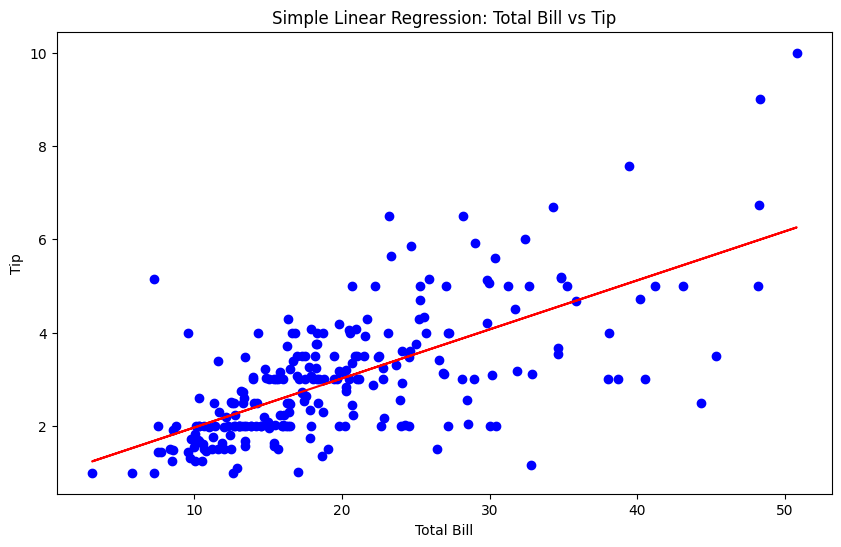

In [7]:
# 6. Write a Python script that analyzes the relationship between total bill and tip in the ‘tips’ dataset using simple linear regression and visualizes the results.

tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression()
model.fit(X, y)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Simple Linear Regression: Total Bill vs Tip')
plt.show()

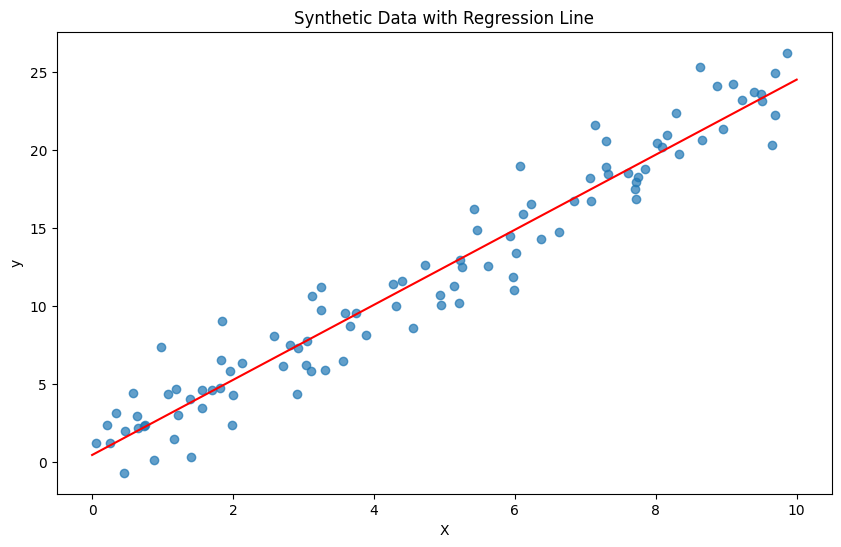

In [8]:
# 7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.randn(100, 1) * 2  # y = 2.5X + noise

model = LinearRegression()
model.fit(X, y)

# Predict
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_new)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, y_pred, color='red')
plt.title('Synthetic Data with Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [9]:
# 8. Write a Python script that pickles a trained linear regression model and saves it to a file.

import pickle

model = LinearRegression()
model.fit(X, y)

# Save to file
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

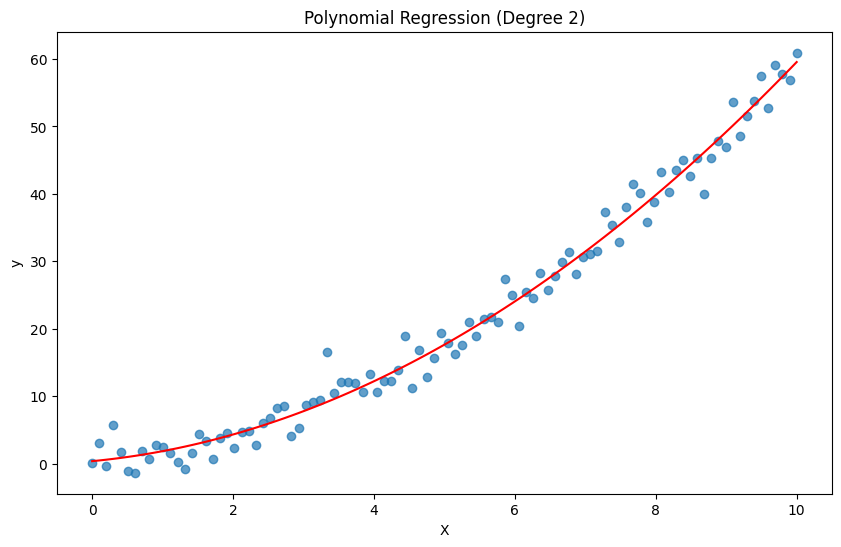

In [10]:
# 9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + np.random.randn(100, 1) * 2

# Transform features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, y_pred, color='red')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [11]:
# 10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model’s coefficient and intercept.

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X + np.random.randn(100, 1) * 1.5  # y = 3X + noise

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")

Coefficient: 2.93
Intercept: 0.32


Degree 1: MSE = 1.81
Degree 2: MSE = 1.75
Degree 3: MSE = 1.74
Degree 4: MSE = 1.72


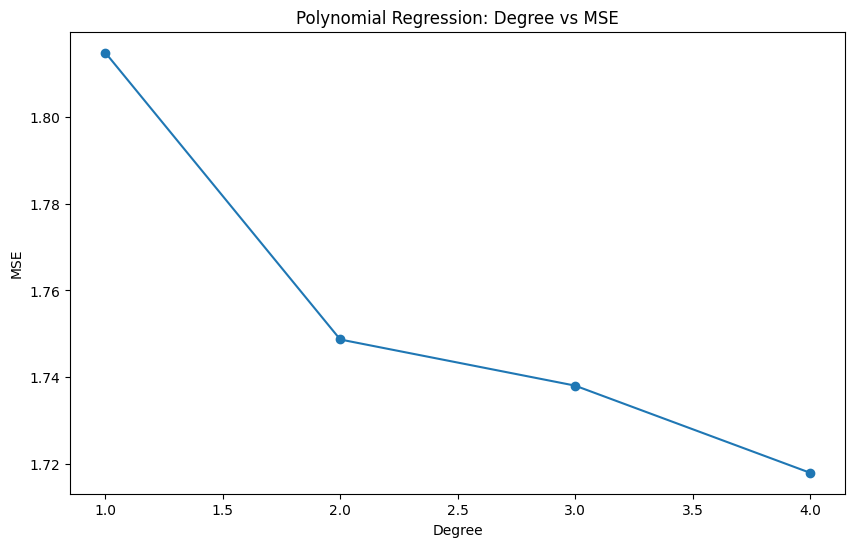

In [12]:
# 11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

degrees = [1, 2, 3, 4]
mse_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    mse_scores.append(mse)
    print(f"Degree {degree}: MSE = {mse:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_scores, marker='o')
plt.title('Polynomial Regression: Degree vs MSE')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.show()

In [13]:
# 12. Write a Python script that fits a simple linear regression model with two features and prints the model’s coefficients, intercept, and R- squared score.

# Generate synthetic data with 2 features
np.random.seed(42)
X = np.random.rand(100, 2) * 10
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 1.5

model = LinearRegression()
model.fit(X, y)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")

Coefficients: [2.05080002 3.0532419 ]
Intercept: -0.34
R-squared: 0.98


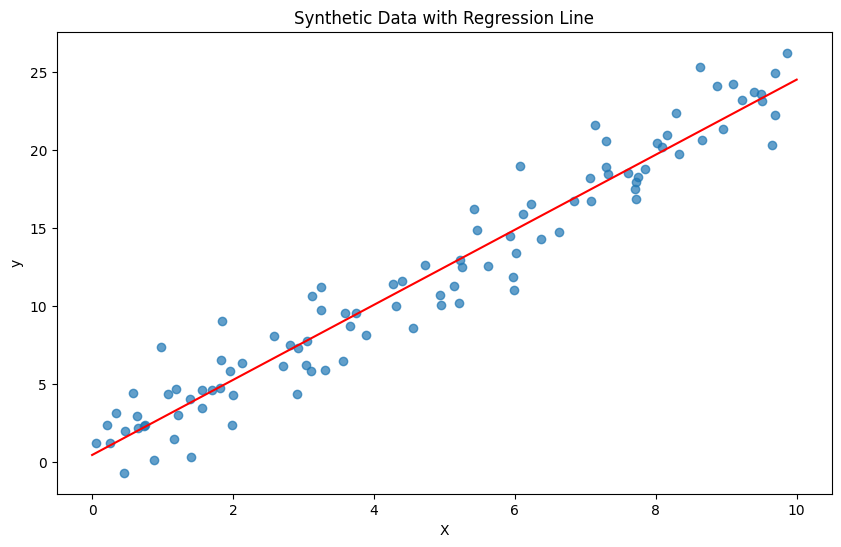

In [14]:
# 13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.


import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.randn(100, 1) * 2  # y = 2.5X + noise

model = LinearRegression()
model.fit(X, y)

# Predict
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_new)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, y_pred, color='red')
plt.title('Synthetic Data with Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [18]:
# 14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.


from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Example dataset (replace with actual data)
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100) * 0.5 + 0.5,
    'feature3': np.random.rand(100) * 2
})

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print(vif_data)

    feature       VIF
0  feature1  3.512884
1  feature2  5.929535
2  feature3  3.530394


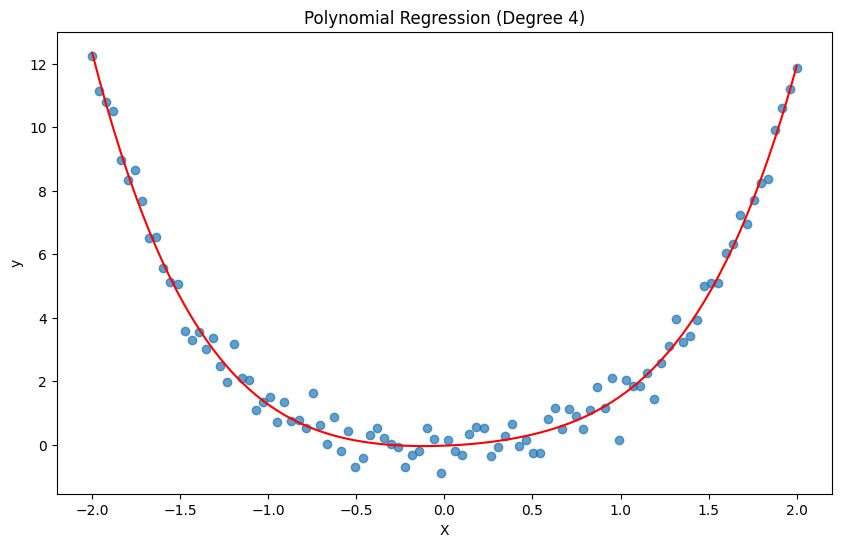

In [19]:
# 15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

np.random.seed(42)
X = np.linspace(-2, 2, 100)
y = 0.5 * X**4 + X**2 + np.random.randn(100) * 0.5

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X.reshape(-1, 1))

model = LinearRegression()
model.fit(X_poly, y)

X_new = np.linspace(-2, 2, 100).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, y_pred, color='red')
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [20]:
# 16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
r2 = pipeline.score(X_test, y_test)
print(f"R-squared: {r2:.2f}")

R-squared: 0.85


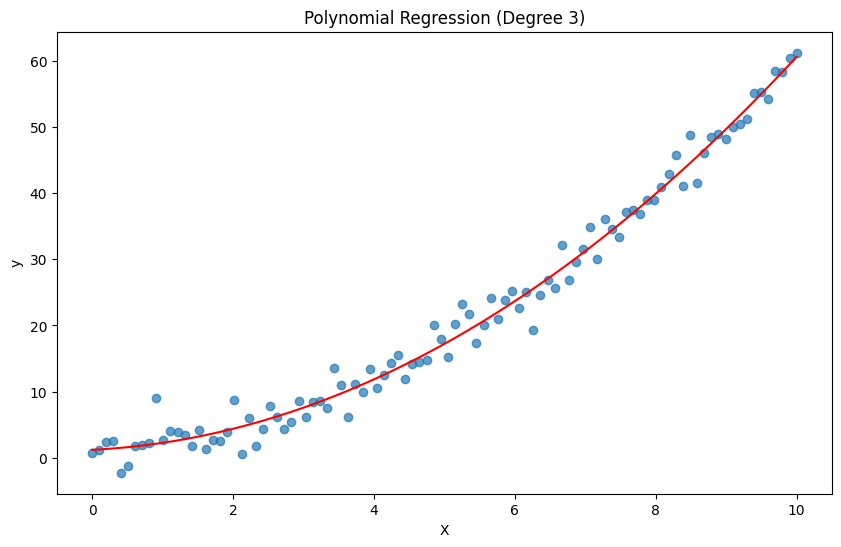

In [22]:
# 17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

# Similar to question 9 with degree=3

# 9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + np.random.randn(100, 1) * 2

# Transform features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, y_pred, color='red')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [23]:
# 18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

np.random.seed(42)
X = np.random.rand(100, 5)
y = 1.5 * X[:, 0] + 2.2 * X[:, 1] - 0.8 * X[:, 2] + 3 * X[:, 3] + 0.5 * X[:, 4] + np.random.randn(100)

model = LinearRegression()
model.fit(X, y)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")

Coefficients: [ 1.23705069  1.77543206 -0.33693331  3.03826237  0.18577644]
Intercept: 0.24
R-squared: 0.52


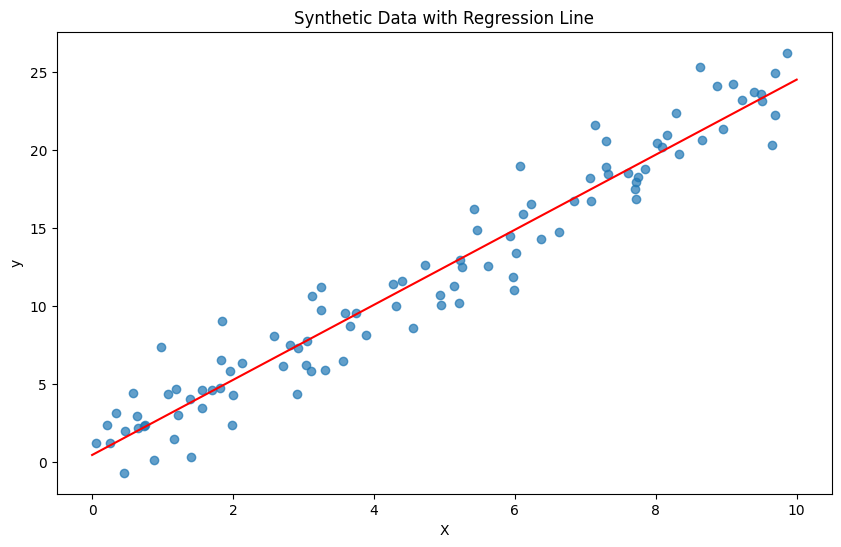

In [24]:
# 19. Write a Python script that generates synthetic data, fits a model, and visualizes the data points along with the regression line.


# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.randn(100, 1) * 2  # y = 2.5X + noise

model = LinearRegression()
model.fit(X, y)

# Predict
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_new)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, y_pred, color='red')
plt.title('Synthetic Data with Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [25]:
# 20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model’s R-squared score and coefficients.

np.random.seed(42)
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 1.5 * X[:, 1] - 0.5 * X[:, 2] + np.random.randn(100)

model = LinearRegression()
model.fit(X, y)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")

Coefficients: [2.27800411 1.34223781 0.07040576]
Intercept: -0.26
R-squared: 0.40


In [26]:
# 21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

from joblib import dump, load

model = LinearRegression()
model.fit(X, y)

# Serialize
dump(model, 'model.joblib')

# Deserialize
loaded_model = load('model.joblib')
print(loaded_model.coef_)

[2.27800411 1.34223781 0.07040576]


In [27]:
# 22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn ‘tips’ dataset.

tips = sns.load_dataset('tips')
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

model = LinearRegression()
model.fit(X_encoded, y)

print(f"R-squared: {model.score(X_encoded, y):.2f}")

R-squared: 0.46


In [28]:
# 23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R-squared score.

from sklearn.linear_model import Ridge

# Generate synthetic data
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + np.random.randn(100)

# Models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)

linear_model.fit(X, y)
ridge_model.fit(X, y)

print("Linear Regression Coefficients:", linear_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)
print("Linear R-squared:", linear_model.score(X, y))
print("Ridge R-squared:", ridge_model.score(X, y))

Linear Regression Coefficients: [ 2.13254431  3.11841527 -1.25891055]
Ridge Regression Coefficients: [ 1.98059047  2.8359268  -1.14368692]
Linear R-squared: 0.6158680323463173
Ridge R-squared: 0.6114459463941135


In [29]:
# 24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared scores: {scores}")
print(f"Average R-squared: {scores.mean():.2f}")

Cross-validated R-squared scores: [0.44346272 0.71125159 0.75885275 0.33342713 0.30588567]
Average R-squared: 0.51


In [30]:
# 25. Write a Python script that compares polynomial regression models of different degrees and prints the R-squared score for each.

degrees = [1, 2, 3, 4]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    r2 = model.score(X_poly, y)
    print(f"Degree {degree}: R-squared = {r2:.2f}")

Degree 1: R-squared = 0.62
Degree 2: R-squared = 0.64
Degree 3: R-squared = 0.66
Degree 4: R-squared = 0.74
